In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pylab
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures

### Объединение данных за все года + усреднение до суток

In [4]:
df = pd.read_csv('gfs_days.csv', sep = ';', index_col = 'Date', parse_dates = ['Date'])

# Температурные инверсии
df['DT1'] = df['TMP_mb_1000'] - df['TMP_mb_925']
df['DT2'] = df['TMP_mb_925'] - df['TMP_mb_850']
df['DT3'] = df['TMP_mb_1000'] - df['TMP_mb_850']

df

,4LFTX,ABSV_mb_700,ABSV_mb_750,ABSV_mb_800,ABSV_mb_850,ABSV_mb_900,ABSV_mb_925,ABSV_mb_950,ABSV_mb_975,ABSV_mb_1000,...,VVEL_mb_950,VVEL_mb_975,VVEL_mb_1000,VVEL_sig_0995,VWSH_pv_p2,VWSH_tropo,WEASD,DT1,DT2,DT3
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,15.503754,0.000108,0.000113,0.000108,0.000101,0.000119,0.000124,0.000068,0.000061,0.000120,...,-0.091840,0.051535,0.067285,0.077051,-0.003964,-0.003923,27.000000,-1.086754,2.563396,1.476642
2019-01-02,13.393949,0.000082,0.000098,0.000089,0.000103,0.000120,0.000074,-0.000041,-0.000010,0.000112,...,0.217081,0.296434,0.225434,0.240842,-0.000174,0.000870,28.000000,-0.483261,2.844635,2.361374
2019-01-03,16.367351,0.000162,0.000144,0.000131,0.000134,0.000146,0.000110,0.000023,0.000034,0.000104,...,0.233982,0.289983,0.280483,0.294917,-0.003014,-0.003251,28.375000,0.401894,1.805201,2.207094
2019-01-04,17.259163,0.000137,0.000125,0.000120,0.000126,0.000138,0.000132,0.000134,0.000161,0.000154,...,0.027723,0.060357,0.072836,0.080266,-0.000009,0.000795,28.500000,-3.801737,1.878059,-1.923678
2019-01-05,13.000077,0.000105,0.000107,0.000115,0.000135,0.000116,0.000025,-0.000056,0.000017,0.000124,...,0.492098,0.375910,0.231913,0.272250,-0.000494,-0.000720,28.500000,-2.246016,0.371612,-1.874403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,13.987585,0.000106,0.000106,0.000126,0.000109,0.000078,0.000105,0.000168,0.000220,0.000145,...,0.173560,0.146124,0.162749,0.231069,0.000731,-0.000715,7.826001,-1.346138,4.102550,2.756412
2023-03-24,13.478010,0.000166,0.000129,0.000104,0.000110,0.000113,0.000069,0.000028,0.000025,0.000116,...,0.386917,0.260468,0.192164,0.303138,0.000413,-0.004950,7.536000,2.578205,4.878517,7.456722
2023-03-25,12.699223,0.000128,0.000136,0.000153,0.000101,0.000057,0.000047,0.000014,-0.000018,0.000074,...,0.673255,0.469649,0.373026,0.574540,-0.006657,-0.001471,6.020000,3.989250,3.820641,7.809891


In [5]:
X = df.values

### Стандартизация признаков

In [6]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [7]:
X_std

array([[ 1.37826771, -0.42217066, -0.30252813, ..., -1.20183865,
        -0.54843556, -1.04379036],
       [ 0.97482714, -1.21022743, -0.79872362, ..., -0.99023617,
        -0.4103129 , -0.84057691],
       [ 1.5434061 ,  1.19788731,  0.65408046, ..., -0.67987452,
        -0.9208022 , -0.87601329],
       ...,
       [ 0.84198052,  0.18531758,  0.40961086, ...,  0.57795955,
         0.069025  ,  0.41088964],
       [-0.51047551, -0.72682267, -0.26095744, ...,  0.42060656,
        -0.7163202 , -0.05948106],
       [-0.39730372,  0.92025646,  0.69434116, ...,  0.62942565,
        -0.09930491,  0.36587888]])

### Вычисление ковариационной матрицы, а также собственных векторов и собственных значений с помощью linalg.eig

In [8]:
cov_mat = np.cov(X_std.T)

In [9]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

### С использованием функции cumsum подсчитаем кумулятивную сумму объясненных дисперсий и отобразим ее на графике посредством функции step

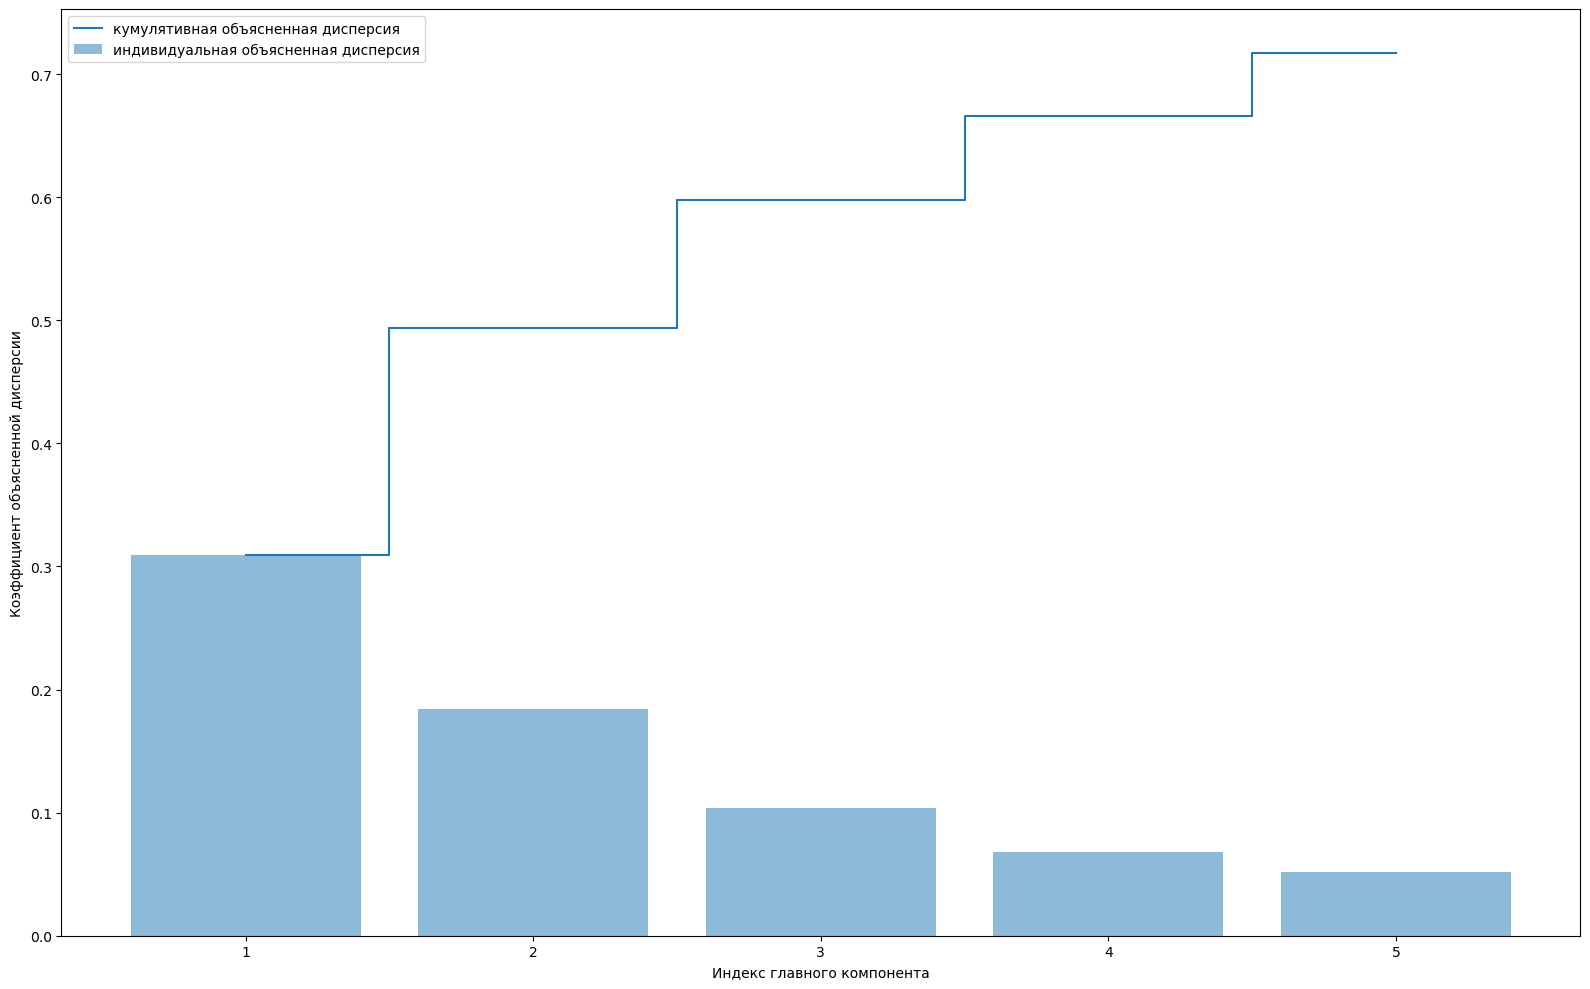

In [10]:
tot = sum(eigen_vals) # Сумма собственных значений
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)] # Доля объяснённой дисперсии
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize = (16, 10))
plt.bar(range(1,6), var_exp[:5], alpha = 0.5, align = 'center', label = 'индивидуальная объясненная дисперсия')
plt.step(range(1,6), cum_var_exp[:5], where ='mid', label = 'кумулятивная объясненная дисперсия')
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главного компонента')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show() 

In [11]:
# Определение числа главных компонент, объясняющих 80% дисперсии
def countPca(eig_vals):
    s = sum(eig_vals)
    tempS = 0
    k = 1
    for val in sorted(eig_vals, reverse = True):
        tempS += val
        print(f'{k}-я главная компонента объясняет {round(val/s*100, 2)}% дисперсии')
        if tempS / s >= 0.8:
            print(f'Первые {k} главные компоненты объясняют {round(tempS / s * 100, 2)}% дисперсии')
            return k
        k += 1

In [12]:
k = countPca(eigen_vals)

1-я главная компонента объясняет 30.92% дисперсии
2-я главная компонента объясняет 18.42% дисперсии
3-я главная компонента объясняет 10.41% дисперсии
4-я главная компонента объясняет 6.82% дисперсии
5-я главная компонента объясняет 5.14% дисперсии
6-я главная компонента объясняет 3.75% дисперсии
7-я главная компонента объясняет 2.64% дисперсии
8-я главная компонента объясняет 2.09% дисперсии
Первые 8 главные компоненты объясняют 80.18% дисперсии


In [13]:
k = 8

### Сортировка собственных пар в порядке убывания собственных значений

In [14]:
# Cоздать список кортежей (собственное значение, собственный вектор)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Oтсортировать кортежи (собственное значение, собственный вектор) от высоких к низким
eigen_pairs.sort(key=lambda k: k[0], reverse = True) 
#eigen_pairs

### Соберем 8 собственных векторов, которые соответствуют 8 наибольшим собственным значениям, чтобы захватить около 80% дисперсии в наборе данных

In [15]:
w = np.hstack([eigen_pairs[i][1] [:, np.newaxis] for i in range(k)])

## Определение весов, с которыми признаки входят в первые 5 главные компоненты

In [16]:
names = pd.read_csv('Names.csv', header = None)

In [17]:
names

,0,1
0,4LFTX,Лучший (4-слойный) индекс поднятия над поверхн...
1,ABSV_mb_700,Абсолютная завихренность на 700mb (1/сек)
2,ABSV_mb_750,Абсолютная завихренность на 750mb (1/сек)
3,ABSV_mb_800,Абсолютная завихренность на 800mb (1/сек)
4,ABSV_mb_850,Абсолютная завихренность на 850mb (1/сек)
...,...,...
168,VVEL_sig_0995,Вертикальная завихренность на 0.995 сигма-слое...
169,VWSH_pv_p2,Вертикальный сдвиг скорости PV=2e-06(км^2/кг/с...
170,VWSH_tropo,Вертикальный сдвиг скорости в тропопаузе (1/сек)
171,WEASD,Водный эквивалент накопленной толщины снежного...


In [18]:
names = names.append({0 : 'DT1', 1: 'приземные и приподнятые инверсии'}, ignore_index = True)
names = names.append({0 : 'DT2', 1: 'высотные инверсии'}, ignore_index = True)
names = names.append({0 : 'DT3', 1: 'мощные инверсии'}, ignore_index = True)

C:\Users\Виталий\AppData\Local\Temp\ipykernel_2416\245697853.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names = names.append({0 : 'DT1', 1: 'приземные и приподнятые инверсии'}, ignore_index = True)
C:\Users\Виталий\AppData\Local\Temp\ipykernel_2416\245697853.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names = names.append({0 : 'DT2', 1: 'высотные инверсии'}, ignore_index = True)
C:\Users\Виталий\AppData\Local\Temp\ipykernel_2416\245697853.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names = names.append({0 : 'DT3', 1: 'мощные инверсии'}, ignore_index = True)


In [19]:
descr = []
for col in df.columns:
    if col in names[0].values:
        descr.append(names[names[0]==col][1].values[0])

In [20]:
weights = pd.DataFrame(index = df.columns)
weights['Расшифровка'] = descr
for i in range(5):
    weights[f'{i+1} компонента'] = abs(w[:, i]) # Взятие модуля

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
pd.reset_option('display.max_rows')

### Трансформируем весь  набор данных в 8 главных компонент, вычислив скалярное произведение матриц X'=XW

In [23]:
X_pca = X_std.dot(w)

In [24]:
X_pca.shape

(1547, 8)

## Данные PM 2.5

In [25]:
# Данные PM 2.5 Министерство за каждые 6 часов
dfAll = pd.read_csv(f"pm25_m.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])

# Размерность массива X меньше размерности значений целевой переменной (до 27 марта 2023), поэтому построим регрессию на меньшей размерности
dfAll = dfAll[:"2023-03-27 12:00:00"] # Срез до конца 2022 года
dfAll.drop(['Березовка', 'Кубеково'], axis = 1, inplace = True)
dfAll

,Черемушки,Кировский,Покровка,Северный,Солнечный,Свердловский,Ветлужанка
Date,,,,,,,
2019-01-01,NaN,NaN,88.40,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,33.99,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,9.36,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,44.34,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,62.41,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-03-23,13.41,15.68,11.88,8.86,16.79,14.63,24.77
2023-03-24,20.45,17.77,5.62,11.56,9.07,10.15,9.19
2023-03-25,9.93,8.95,3.74,7.36,7.44,4.85,7.40


In [26]:
# Усреднение данных по всем датчикам
pm = dfAll.mean(axis = 1)
pm

Date
2019-01-01    88.400000
2019-01-02    33.990000
2019-01-03     9.360000
2019-01-04    44.340000
2019-01-05    62.410000
                ...    
2023-03-23    15.145714
2023-03-24    11.972857
2023-03-25     7.095714
2023-03-26     7.052857
2023-03-27     6.695714
Length: 1547, dtype: float64

In [27]:
# Количество пропусков в данных
pm.isnull().sum()

20

In [28]:
# Добавим колонку pm, чтобы затем удалить пропуски во всех данных
X = pd.DataFrame(X_pca)
X.index = pm.index
X['pm'] = pm.values
X

,0,1,2,3,4,5,6,7,pm
Date,,,,,,,,,
2019-01-01,-5.551524,7.275830,0.218497,1.872473,-1.968988,2.418232,-2.402050,1.921479,88.400000
2019-01-02,-8.401819,5.933879,1.256248,0.719182,-2.178955,3.192792,-1.792751,2.965775,33.990000
2019-01-03,-8.446252,7.046786,0.985680,0.512849,-1.003716,3.173487,0.741020,1.953896,9.360000
2019-01-04,-4.938763,9.132810,-5.493341,2.779783,1.248495,0.223895,0.179649,2.095627,44.340000
2019-01-05,-9.296922,2.575599,-3.050237,0.188916,0.242126,0.264554,-1.336170,3.008355,62.410000
...,...,...,...,...,...,...,...,...,...
2023-03-23,-0.479075,4.241107,-7.991991,2.287876,3.063034,-0.389741,0.989008,1.016240,15.145714
2023-03-24,-3.645735,-1.240785,0.210432,0.320994,1.536213,0.099049,0.315983,0.580445,11.972857
2023-03-25,-5.084238,-6.363829,-2.825133,-4.689684,0.002544,-2.189395,1.380261,0.769950,7.095714


In [29]:
# Удаление пропусков
X.dropna(inplace = True)

## Выборки по периодам повышенной концентрации pm 2.5

### Зимы

In [30]:
win19 = X[:'2019-03-01 00:00:00']
win19_20 = X['2019-11-27 00:00:00':'2020-02-27 00:00:00']
win20_21 = X['2020-11-27 00:00:00':'2021-02-25 00:00:00']
win21_22 = X['2021-12-15 00:00:00':'2022-02-22 00:00:00']
win22_23 = X['2022-12-13 00:00:00' : '2023-02-22 00:00:00']

winters = pd.concat([win19, win19_20, win20_21, win21_22, win22_23])

### Май июнь июль

In [31]:
sum19 = X['2019-05-01' : '2019-07-12']
sum20 = X['2020-05-01' : '2020-08-01']
sum21 = X['2021-05-01' : '2021-08-01']
sum22 = X['2022-05-01' : '2022-08-01']

summers = pd.concat([sum19, sum20, sum21, sum22])

### Март апрель ноябрь

In [32]:
spr19 = pd.concat([X['2019-03-10' : '2019-05-01'], X['2019-11-01' : '2019-11-22']])
spr20 = pd.concat([X['2020-03-01' : '2020-05-01'], X['2020-11-01' : '2020-11-10']])
spr21 = pd.concat([X['2021-03-10' : '2021-05-01'], X['2021-11-01' : '2021-11-25']])
spr22 = pd.concat([X['2022-03-01' : '2022-05-01'], X['2022-11-01' : '2022-11-25']])
spr23 = X['2023-03-01' : ]

springs = pd.concat([spr19, spr20, spr21, spr22, spr23])

### Август сентябрь октябрь

In [33]:
aut19 = X['2019-08-21' : '2019-10-16']
aut20 = X['2020-08-17' : '2020-10-30']
aut21 = X['2021-08-15' : '2021-11-01']
aut22 = X['2022-08-01' : '2022-10-14']

autumns = pd.concat([aut19, aut20, aut21, aut22])

In [34]:
data = autumns.copy()
data

,0,1,2,3,4,5,6,7,pm
Date,,,,,,,,,
2019-08-21,7.655790,-0.728469,2.335254,0.282566,-1.044008,2.349165,-3.377950,-1.250905,8.688000
2019-08-22,10.335574,0.119404,-1.708677,3.977530,0.174426,0.744930,0.878267,-2.077048,11.036000
2019-08-23,7.192633,-3.320252,2.004169,5.600836,-4.732401,2.030839,2.505807,-0.728583,10.670000
2019-08-24,2.666470,-4.451983,6.581603,-0.579116,-6.987900,2.955133,5.377608,0.419427,5.386000
2019-08-25,4.392048,-4.333913,1.213842,-3.668913,-2.800315,1.172246,-0.013353,-0.723273,18.430000
...,...,...,...,...,...,...,...,...,...
2022-10-10,-1.318573,-7.583848,1.424599,-0.636393,-0.016337,6.067943,1.864893,-2.465304,7.943333
2022-10-11,-4.671193,-11.537503,-1.183695,-4.362412,-3.565155,2.227823,2.999197,-2.827662,4.451667
2022-10-12,-2.469017,-4.892756,5.364881,-1.305092,-1.324909,0.439684,-0.528425,-2.735787,4.966000


### Корреляция главных компонент с PM 2.5

In [35]:
data.corr()['pm']

0     0.416625
1     0.290720
2    -0.506804
3     0.097240
4     0.046889
5    -0.160271
6    -0.083568
7    -0.016713
pm    1.000000
Name: pm, dtype: float64

# Диаграммы рассеяния

# Линейная регрессия

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
# Сравнение графиков двух списков значений
def CompareGraph(x, y1, y2, l1, l2, title):
    plt.figure(figsize = (9, 4))
    plt.plot(x, y1, label = l1)
    plt.plot(x, y2, label = l2)

    plt.xlabel('time')
    plt.ylabel('PM 2.5, мкг/м³')
    plt.title(title)
    
    plt.legend()
    plt.grid()

In [38]:
# Прогнозы линейной регрессии и вычисление ошибок
def PredictAndMetrics(model, X, y, rnd = 2, plot = False, modelName = ''):
    y_pred = model.predict(X)
    
    if plot:
        CompareGraph(y.index, y, y_pred, 'Истинные значения', 'Пронозируемые значения', f'Сравнение прогноза {modelName} с истинными данными')
    
    return list(map(lambda i: round(i, rnd), [mean_squared_error(y, y_pred), mean_absolute_error(y, y_pred), r2_score(y, y_pred)]))#, 1 - (1-r2_score(y, y_pred))*(X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)]))

In [39]:
# Применение линейной регрессии с train_test_split
def Regression(X, y, ts, vs = 0, modelType = 'linear', alpha = 1.0, l1_ratio = 0.5):
    # Разбиение выборки на тренировочную и тестовую с соотношением 1-ts : ts
    '''tscv = TimeSeriesSplit(n_splits = 2, test_size = int(len(y) * ts))
    
    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        X_train, X_test = X[train_index, :], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]'''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts+vs, random_state = 0)
    # Использование валидационной выборки
    if vs:
        X_test, X_valid, y_test, y_valid  = train_test_split(X_test, y_test, test_size = vs/(ts + vs), random_state = 0)
    
    # Создание и обучение модели
    if modelType == 'linear':
        model = LinearRegression()
    
    if modelType == 'lasso':
        from sklearn.linear_model import Lasso
        model = Lasso(alpha = alpha)
        
    if modelType == 'ridge':
        from sklearn.linear_model import Ridge
        model = Ridge(alpha = alpha)
        
    
    if modelType == 'elastic':
        from sklearn.linear_model import ElasticNet
        model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
    
    
    model.fit(X_train, y_train)
    
    # Список ошибок
    metr = []
    
    # Тренировочная выборка 
    metr.append(PredictAndMetrics(model, X_train, y_train))
    
    # Тестовая выборка
    metr.append(PredictAndMetrics(model, X_test, y_test))
    
    # Валидационная выборка
    if vs: metr.append(PredictAndMetrics(model, X_valid, y_valid))
    
    return model, metr

In [40]:
# Возведение признаков в степень
def PolynomFeat(X, degree):
    # Возведение признаков в степень
    pol = PolynomialFeatures(degree = degree)
    return pol.fit_transform(X)

# 8 главных компонент

### Построение различных моделей регрессии

In [41]:
# Построение различных моделей регрессии
def BuildModels(data, forecastDF = []):
    
    # Целевая переменная и признаки
    y = data['pm'].values
    x = data.drop(['pm'], axis = 1).values
    
    
    linTypes = ['linear', 'lasso', 'ridge']
    polDegr = [2, 3]


    train_res = pd.DataFrame({'Train ' : ['MSE', 'MAE', 'R2']})

    test_res = pd.DataFrame({'Test ' :  ['MSE', 'MAE', 'R2']}) 
    
    forecast_res = [pd.DataFrame({'Forecast ' + str(forec.shape[0]) + ' days' : ['MSE', 'MAE', 'R2']}) for forec in forecastDF] 
    
    # Размер валидационной выборки
    vs = 0.1
    
    if vs: valid_res = pd.DataFrame({'Valid ' : ['MSE', 'MAE', 'R2']}) 

    
    # Линейные регрессии
    for mod in linTypes:

        # Построение моделей, ошибки на train и test
        model, metr = Regression(x, y, ts = 0.2, vs = vs, modelType = mod)

        train_res[mod] = metr[0]
        test_res[mod] = metr[1]
        if vs:
            valid_res[mod] = metr[2]

        # Прогнозирование
        for i in range(len(forecastDF)):
            metr = PredictAndMetrics(model, forecastDF[i].drop(['pm'], axis = 1).values, forecastDF[i]['pm'])#, plot = True, modelName = mod + f' на {forecastDF[i].shape[0]} дней')
            forecast_res[i][mod] = metr

    if k < 20:
        # Полиномиальные регрессии    
        for degr in polDegr:

            # Построение моделей, ошибки на train и test
            model, metr = Regression(PolynomFeat(x, degr), y, ts = 0.2, vs = 0.1)
            train_res[f'Полиномиальная {degr} степени'] = metr[0]
            test_res[f'Полиномиальная {degr} степени'] = metr[1]
            if vs: valid_res[f'Полиномиальная {degr} степени'] = metr[2]

            # Прогнозирование
            for i in range(len(forecastDF)):
                metr = PredictAndMetrics(model, PolynomFeat(forecastDF[i].drop(['pm'], axis = 1).values, degr), forecastDF[i]['pm'])
                forecast_res[i][f'Полиномиальная {degr} степени'] = metr
    
    #print('Тренировочная выборка')
    display(train_res)
    
    #print('Тестовая выборка')
    display(test_res)
    
    #print('Отложенная выборка')
    if vs: display(valid_res)
    
    #print('Прогнозирование')
    for i in range(len(forecastDF)):
        display(forecast_res[i])
    
    if vs:
        return [train_res, test_res, valid_res] + forecast_res
    return [train_res, test_res] + forecast_res

# Регрессия на наиболее весомые признаки

In [42]:
import seaborn as sns

In [43]:
# Веса вхождения признаков в каждую главную компоненту
weights_k = pd.DataFrame(index = df.columns)
for i in range(k):
    weights_k[f'{i+1} компонента'] = abs(w[:, i]) # Взятие модуля
weights_k

,1 компонента,2 компонента,3 компонента,4 компонента,5 компонента,6 компонента,7 компонента,8 компонента
4LFTX,0.110043,0.067084,0.029403,0.038398,0.044406,0.041217,0.029377,0.100963
ABSV_mb_700,0.018467,0.014092,0.084001,0.039327,0.056104,0.040785,0.209023,0.046853
ABSV_mb_750,0.019121,0.016579,0.081207,0.040675,0.004580,0.028137,0.252141,0.036925
ABSV_mb_800,0.019026,0.009759,0.062849,0.033914,0.036039,0.009176,0.264837,0.006925
ABSV_mb_850,0.001438,0.021104,0.053956,0.027717,0.067355,0.004537,0.240636,0.045883
...,...,...,...,...,...,...,...,...
VWSH_tropo,0.011111,0.012277,0.036945,0.014457,0.008790,0.074915,0.000160,0.029437
WEASD,0.101249,0.043515,0.028417,0.079855,0.016954,0.077721,0.023513,0.137999
DT1,0.030158,0.092251,0.124806,0.064478,0.077077,0.054158,0.080986,0.051989
DT2,0.075421,0.075846,0.046089,0.031366,0.125581,0.080979,0.010939,0.021223


## Тепловая карта корреляций и отбор признаков, коррелирующих с pm >= 0.2

In [44]:
pd.options.mode.chained_assignment = None

In [45]:
# Отбор признаков, наиболее коррелирующих с PM, исключая мультиколлинеарность
def featureSelect(matr, features, corrPMvalue = 0.2, corrFeatValue = 0.6):
    # Признаки, коррелирующие с другими
    corrFeatures = []
    for feat in matr.apply(abs).sort_values(by='pm', ascending=False)[1:].index:
        # Признаки, которых нет в списке коррелирующих и которые коррелируют с PM со значением >= 0.2
        if feat not in features and feat not in corrFeatures and abs(matr[feat]['pm']) >= corrPMvalue:
            features.append(feat)
            # Исключить признаки коррелирующие с текущим
            for fcor, cor in zip(matr[feat].index[:-1], matr[feat].values[:-1]):
                
                # Если корреляция Спирмена составляет больше 0.6
                if fcor != feat and abs(cor) >= corrFeatValue:
                    corrFeatures.append(fcor)

In [46]:
# Исключение признков, коррелируяющих с другими
def featureExcluse(matr, features, corrFeatValue = 0.6):
    # Признаки, коррелирующие с другими
    corrFeatures = []
    # По убыванию корреляций с PM
    for feat in matr.apply(abs).sort_values(by='pm', ascending=False)[1:].index:
        # Исключить признаки коррелирующие с текущим
        if feat not in corrFeatures:
            for fcor, cor in zip(matr[feat].index[:-1], matr[feat].values[:-1]):
                # Если корреляция Спирмена составляет больше 0.6
                if fcor != feat and abs(cor) >= corrFeatValue:
                    corrFeatures.append(fcor)
                    
                    if fcor in features:
                        features.remove(fcor)

Возьмём по 5 признаков из каждой главной компоненты

In [47]:
data = autumns.copy()

### Выборки прогнозирования на 3 и 5 дней

In [48]:
forec5Ind = data.iloc[-5:].index
forec3Ind = forec5Ind[:3]

In [49]:
# Удаление выборок прогноза из датасета
data = data.iloc[:-5]

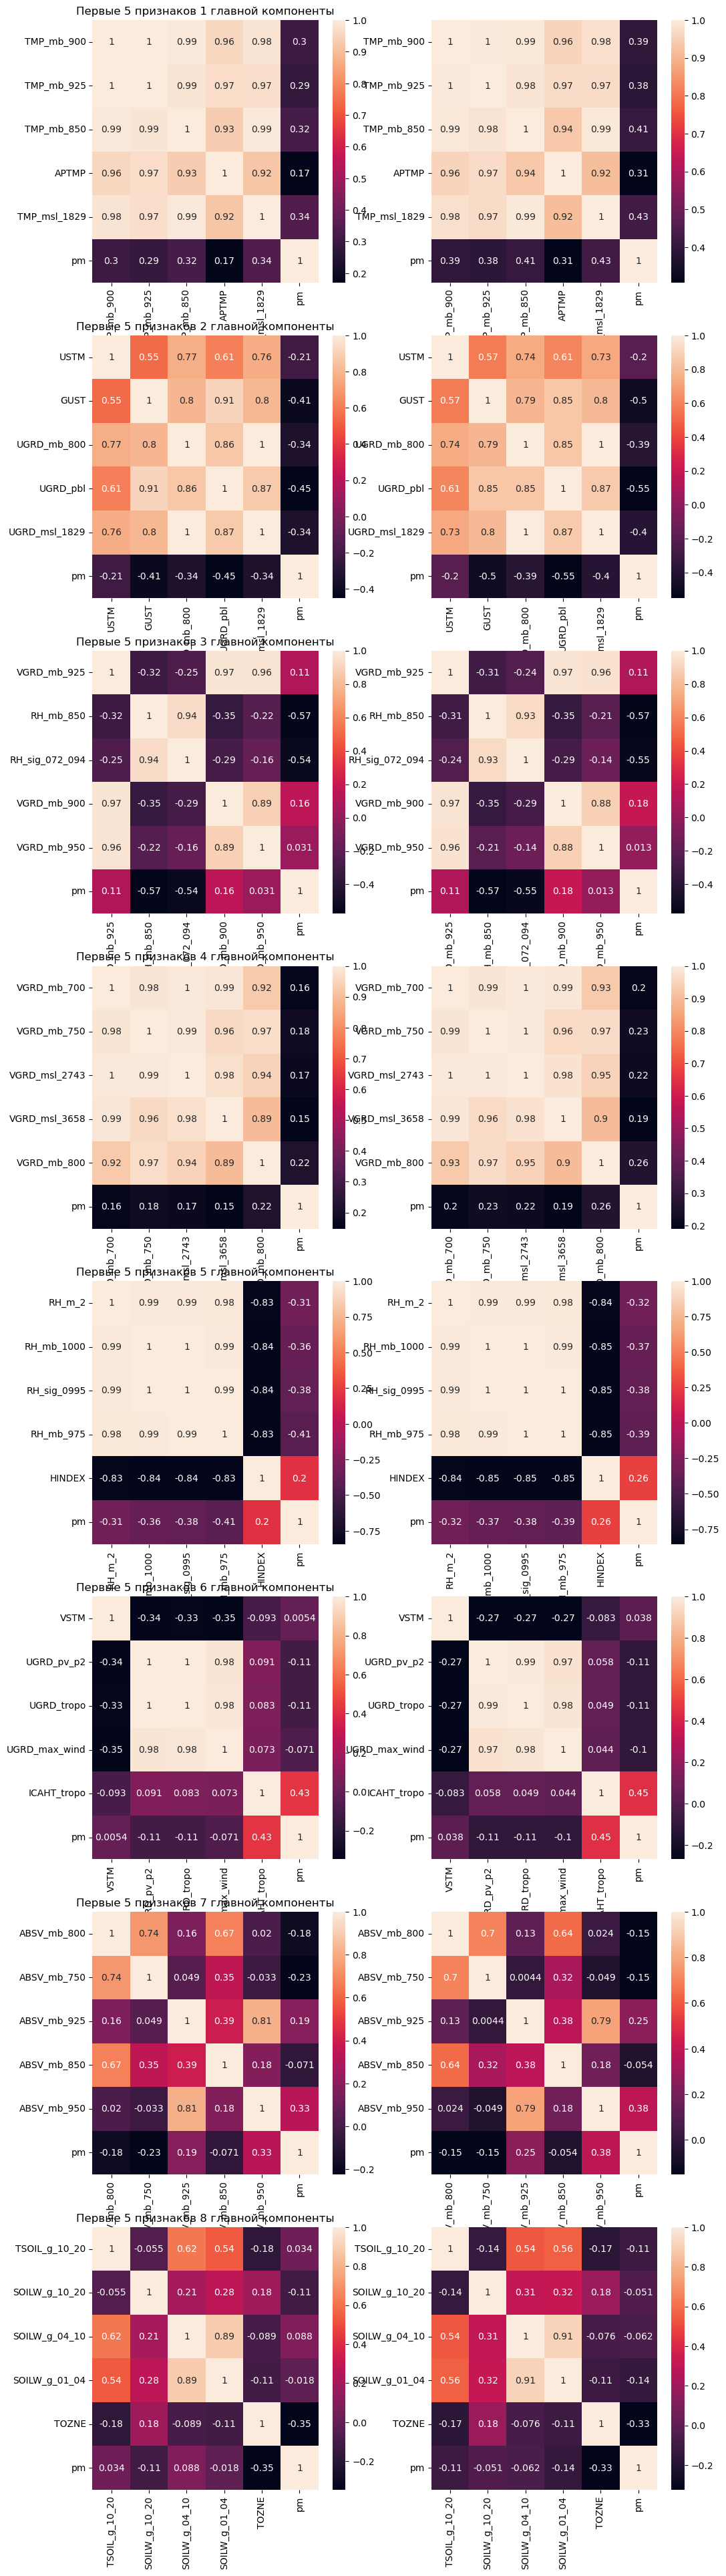

In [69]:
nf = 5 # Количество признаков
k = 8 # количество главных компонент

features = []

plt.figure(figsize = (12, 6*k))
for i in range(k):
    feati = [] # Признаки i-й главной компоненты 
    for feat in list(weights_k.sort_values(by=f'{i+1} компонента', ascending=False).iloc[:, [0, 1]].index[:nf]):
        feati.append(feat)
        
    tdf = df.loc[data.index][feati]
    tdf['pm'] = pm.loc[data.index]
    
    #sns.heatmap(tdf.corr(), annot = True)
    
    #plt.show()
    
    # Корреляции Пирсона (слева) и Спирмена (справа)
    plt.subplot(k, 2, 2*i+1)
    sns.heatmap(tdf.corr(), annot = True)
    
    plt.title(f'Первые {nf} признаков {i+1} главной компоненты')
    
    plt.subplot(k, 2, 2*i+2)
    spear = tdf.corr(method = 'spearman')
    sns.heatmap(spear, annot = True)
    
    # Отбор признаков
    featureSelect(spear, features)
    
plt.show()

In [67]:
features

['TMP_msl_1829',
 'UGRD_pbl',
 'RH_mb_850',
 'VGRD_mb_800',
 'RH_mb_975',
 'ICAHT_tropo',
 'ABSV_mb_950',
 'TOZNE',
 'DT1',
 'DT2',
 'DT3']

### Искусственно добавим инверсии

In [64]:
features += ['DT1', 'DT2', 'DT3']

In [65]:
# Добавим колонку pm, чтобы затем удалить пропуски во всех данных
X = df.loc[data.index][features].copy()
X['pm'] = pm.loc[data.index].values

<AxesSubplot:>

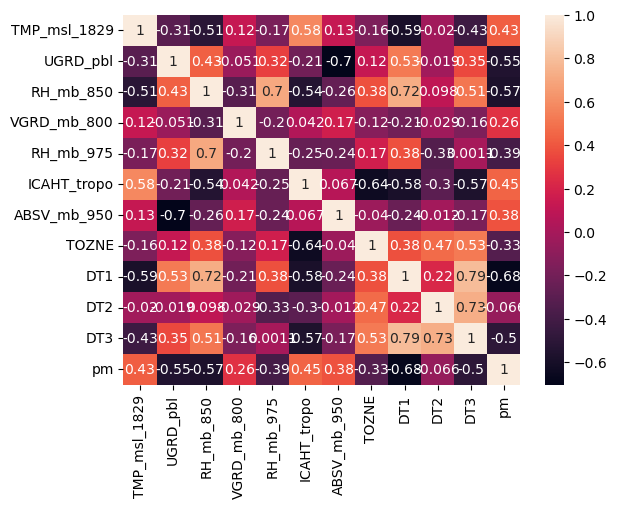

In [66]:
# Проверка коллинеарности в наборе данных
sns.heatmap(X.corr(method = 'spearman'), annot = True)

In [55]:
# Избавление от коллинеарности в получившихся данных
features = []
featureSelect(X.corr(method = 'spearman'), features)
features

['DT1',
 'UGRD_m_100',
 'PRES_tropo',
 'RH_mb_u30',
 'TMP_msl_1829',
 'VGRD_msl_1829']

In [56]:
X = X[features + ['pm']].copy()
X

,DT1,UGRD_m_100,PRES_tropo,RH_mb_u30,TMP_msl_1829,VGRD_msl_1829,pm
Date,,,,,,,
2019-08-21,3.930816,2.236128,24802.757750,67.775000,5.023130,0.877243,8.688000
2019-08-22,2.887501,-2.748196,24023.792375,55.550000,7.329130,4.585145,11.036000
2019-08-23,4.291859,1.804608,23460.457750,81.000000,8.460199,5.133006,10.670000
2019-08-24,3.957363,6.521138,25759.587375,91.525001,4.849981,-3.182254,5.386000
2019-08-25,2.747902,5.624439,24347.778875,75.775000,6.321306,-2.706306,18.430000
...,...,...,...,...,...,...,...
2022-10-05,3.505241,5.509838,26453.236125,75.537500,-6.242777,-0.261249,15.215000
2022-10-06,4.193043,4.163255,30893.724125,96.312501,-9.583712,-5.188754,4.071667
2022-10-07,3.655151,1.541696,21813.373625,74.337500,-7.005621,1.519530,6.106667


In [57]:
X.corr()['pm'][:-1]

DT1             -0.696157
UGRD_m_100      -0.461721
PRES_tropo      -0.422650
RH_mb_u30       -0.441189
TMP_msl_1829     0.342511
VGRD_msl_1829    0.230453
Name: pm, dtype: float64

In [58]:
features

['DT1',
 'UGRD_m_100',
 'PRES_tropo',
 'RH_mb_u30',
 'TMP_msl_1829',
 'VGRD_msl_1829']

In [59]:
# Удаление пропусков
X.dropna(inplace = True)

In [60]:
# Формирование выборок прогнозирования
forec3 = df.loc[forec3Ind][features]
forec3['pm'] = pm.loc[forec3Ind].values

forec5 = df.loc[forec5Ind][features]
forec5['pm'] = pm.loc[forec5Ind].values

## Построение моделей

In [61]:
resultDfs = BuildModels(X, [forec3, forec5])

,Train,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,17.08,17.84,17.08,40.07,214.20
1,MAE,2.94,3.02,2.94,4.94,10.77
2,R2,0.48,0.45,0.48,-0.23,-5.57


,Test,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,12.39,15.77,12.41,56.97,503.34
1,MAE,2.37,2.58,2.37,4.83,15.49
2,R2,0.69,0.60,0.69,-0.43,-11.66


,Valid,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,12.49,12.84,12.49,48.02,335.23
1,MAE,2.75,2.78,2.75,5.61,14.95
2,R2,0.50,0.49,0.50,-0.91,-12.35


,Forecast 3 days,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,1.19,2.03,1.19,23.48,126.59
1,MAE,0.72,1.21,0.72,4.84,9.82
2,R2,0.50,0.14,0.50,-8.91,-52.44


,Forecast 5 days,linear,lasso,ridge,Полиномиальная 2 степени,Полиномиальная 3 степени
0,MSE,3.67,5.09,3.67,25.12,205.10
1,MAE,1.38,1.70,1.38,4.59,12.77
2,R2,-0.46,-1.03,-0.46,-9.02,-80.78
